In [309]:
import pandas as pd

# Step 1: Load the Datasets
d2 = pd.read_csv('1990sClassicHits.csv')
d1 = pd.read_csv('recognition_by_generation.csv')

# Step 2: Clean the Data
# Forward fill and drop duplicates
d2 = d2.ffill().drop_duplicates()
d1 = d1.ffill().drop_duplicates()

# Step 3: Prepare for Merging
# Standardize column names
d1.rename(columns={'artist': 'Artist', 'song': 'Track'}, inplace=True)

# Select relevant columns from d2, including Duration
d2 = d2[['Track', 'Artist', 'Duration', 'Danceability', 'Energy', 'Tempo', 'Popularity']]

# Step 4: Merge the Datasets
# Merge on 'Artist' and 'Track' and keep only matching songs (inner join)
d3 = pd.merge(d1, d2, on=['Artist', 'Track'], how='inner')

# Step 5: Final Clean-up
# Drop any remaining duplicates just in case
d3 = d3.drop_duplicates()
sorted_d3 = d3.sort_values(by='Popularity', ascending=False)


# Show the result of the merged DataFrame (d3), including the Duration column
print(d3.head())
print(d3.info())
sorted_d3


              Artist                    Track  mean_millennial_recognition  \
0                702       Where My Girls At?                     0.553481   
1       Adina Howard            Freak Like Me                     0.207478   
2  Alanis Morissette                   Ironic                     0.887612   
3      Alannah Myles             Black Velvet                     0.621799   
4              Alias  More Than Words Can Say                     0.075031   

   mean_gen_z_recognition Duration  Danceability  Energy    Tempo  Popularity  
0                0.244176     2:46         0.705   0.725   92.186          60  
1                0.139892     4:13         0.655   0.837   91.014          58  
2                0.587672     3:50         0.408   0.582  114.926          75  
3                0.395484     4:47         0.750   0.366   91.138          72  
4                0.107534     3:54         0.412   0.376   69.064          50  
<class 'pandas.core.frame.DataFrame'>
Index: 199 en

,Artist,Track,mean_millennial_recognition,mean_gen_z_recognition,Duration,Danceability,Energy,Tempo,Popularity
11,Barenaked Ladies,One Week,0.728785,0.256913,4:04,0.264,0.640,84.828,91
109,Mariah Carey,My All,0.325133,0.173403,2:17,0.504,0.308,113.950,89
27,Brandy,Have You Ever?,0.374130,0.165090,2:40,0.741,0.697,116.109,87
81,Keith Sweat,Nobody,0.127224,0.109736,3:00,0.358,0.284,99.796,86
80,Karyn White,Romantic,0.111855,0.161892,2:12,0.571,0.544,132.052,86
...,...,...,...,...,...,...,...,...,...
8,Amy Grant,Every Heartbeat,0.184151,0.103027,3:33,0.648,0.890,126.956,39
135,Paula Abdul,The Promise Of A New Day,0.109906,0.043116,4:32,0.754,0.820,119.835,37
173,Sweet Sensation,If Wishes Came True,0.054886,0.051567,5:15,0.493,0.453,143.725,33
30,Calloway,I Wanna Be Rich,0.078018,0.056424,5:04,0.733,0.781,114.181,33


In [282]:
# Get summary statistics for the numerical columns in d3
d3_description = d3.describe()
print(d3_description)

       mean_millennial_recognition  mean_gen_z_recognition  Danceability  \
count                   199.000000              199.000000    199.000000   
mean                      0.390711                0.227929      0.608462   
std                       0.265237                0.207500      0.151342   
min                       0.049024                0.022254      0.152000   
25%                       0.160289                0.088963      0.520000   
50%                       0.325133                0.147477      0.626000   
75%                       0.576457                0.291468      0.720000   
max                       0.983381                0.963497      0.979000   

           Energy       Tempo  Popularity  
count  199.000000  199.000000  199.000000  
mean     0.596235  118.297528   65.095477  
std      0.214334   30.129445   12.294202  
min      0.005040   59.999000   33.000000  
25%      0.462000   97.177000   57.000000  
50%      0.608000  115.229000   66.000000  
75%    

In [283]:
# Ensure that the columns are in the correct order in d3
d3 = d3[['Artist', 'Track', 'Duration', 'mean_millennial_recognition', 'mean_gen_z_recognition', 
         'Danceability', 'Energy', 'Tempo', 'Popularity']]

# Display the first few rows to confirm the order
display(d3.head())


,Artist,Track,Duration,mean_millennial_recognition,mean_gen_z_recognition,Danceability,Energy,Tempo,Popularity
0,702,Where My Girls At?,2:46,0.553481,0.244176,0.705,0.725,92.186,60
1,Adina Howard,Freak Like Me,4:13,0.207478,0.139892,0.655,0.837,91.014,58
2,Alanis Morissette,Ironic,3:50,0.887612,0.587672,0.408,0.582,114.926,75
3,Alannah Myles,Black Velvet,4:47,0.621799,0.395484,0.750,0.366,91.138,72
4,Alias,More Than Words Can Say,3:54,0.075031,0.107534,0.412,0.376,69.064,50


In [284]:
#Popularity


In [285]:
d3 = d3.sort_values(by='Popularity', ascending=False)
d3

,Artist,Track,Duration,mean_millennial_recognition,mean_gen_z_recognition,Danceability,Energy,Tempo,Popularity
11,Barenaked Ladies,One Week,4:04,0.728785,0.256913,0.264,0.640,84.828,91
109,Mariah Carey,My All,2:17,0.325133,0.173403,0.504,0.308,113.950,89
27,Brandy,Have You Ever?,2:40,0.374130,0.165090,0.741,0.697,116.109,87
81,Keith Sweat,Nobody,3:00,0.127224,0.109736,0.358,0.284,99.796,86
80,Karyn White,Romantic,2:12,0.111855,0.161892,0.571,0.544,132.052,86
...,...,...,...,...,...,...,...,...,...
8,Amy Grant,Every Heartbeat,3:33,0.184151,0.103027,0.648,0.890,126.956,39
135,Paula Abdul,The Promise Of A New Day,4:32,0.109906,0.043116,0.754,0.820,119.835,37
173,Sweet Sensation,If Wishes Came True,5:15,0.054886,0.051567,0.493,0.453,143.725,33
30,Calloway,I Wanna Be Rich,5:04,0.078018,0.056424,0.733,0.781,114.181,33


In [286]:
# Rearrange the columns so that 'Popularity' comes directly after 'Duration' and 'Duration' comes directly after 'Track'
d3 = d3[['Artist', 'Track', 'Duration', 'Popularity', 'mean_millennial_recognition', 'mean_gen_z_recognition', 
         'Danceability', 'Energy', 'Tempo']]

# Display the first few rows to confirm the order
display(d3)

,Artist,Track,Duration,Popularity,mean_millennial_recognition,mean_gen_z_recognition,Danceability,Energy,Tempo
11,Barenaked Ladies,One Week,4:04,91,0.728785,0.256913,0.264,0.640,84.828
109,Mariah Carey,My All,2:17,89,0.325133,0.173403,0.504,0.308,113.950
27,Brandy,Have You Ever?,2:40,87,0.374130,0.165090,0.741,0.697,116.109
81,Keith Sweat,Nobody,3:00,86,0.127224,0.109736,0.358,0.284,99.796
80,Karyn White,Romantic,2:12,86,0.111855,0.161892,0.571,0.544,132.052
...,...,...,...,...,...,...,...,...,...
8,Amy Grant,Every Heartbeat,3:33,39,0.184151,0.103027,0.648,0.890,126.956
135,Paula Abdul,The Promise Of A New Day,4:32,37,0.109906,0.043116,0.754,0.820,119.835
173,Sweet Sensation,If Wishes Came True,5:15,33,0.054886,0.051567,0.493,0.453,143.725
30,Calloway,I Wanna Be Rich,5:04,33,0.078018,0.056424,0.733,0.781,114.181


In [287]:
# Step 1: Check the number of entries in the original datasets
d1_count = len(d1)
d2_count = len(d2)

# Step 2: Check the number of entries in the merged dataset (d3)
d3_count = len(d3)

# Step 3: Identify any missing songs after the merge
missing_songs = pd.merge(d1, d2, on=['Artist', 'Track'], how='outer', indicator=True)
missing_songs = missing_songs[missing_songs['_merge'] != 'both']

# Output the results
print(f"Number of entries in d1: {d1_count}")
print(f"Number of entries in d2: {d2_count}")
print(f"Number of entries in d3 after the merge: {d3_count}")
print(f"Missing songs (not included in the merge):")
print(missing_songs[['Artist', 'Track', '_merge']].head(40))  # Shows the first 40 missing songs

# Step 4: If necessary, correct the merge to include all songs
d3_corrected = pd.merge(d1, d2, on=['Artist', 'Track'], how='outer')

# Display the first few rows of the corrected DataFrame
print(d3_corrected.head())


Number of entries in d1: 344
Number of entries in d2: 919
Number of entries in d3 after the merge: 199
Missing songs (not included in the merge):
                                         Artist  \
0                                10,000 Maniacs   
1                                           112   
2                        112 featuring Lil Zane   
3   112 featuring The Notorious B.I.G. and Mase   
4                                         2 Pac   
5                 20 Fingers featuring Gillette   
6                                          2Pac   
7                                          2Pac   
8                                          2Pac   
9                                          2Pac   
10                                           3T   
11                                4 Non Blondes   
12                                       4 P.M.   
13                                      69 Boyz   
14                                          702   
16                                    

In [288]:
# Standardize artist and track names by stripping whitespace and converting to lowercase
d1['Artist'] = d1['Artist'].str.strip().str.lower()
d1['Track'] = d1['Track'].str.strip().str.lower()

d2['Artist'] = d2['Artist'].str.strip().str.lower()
d2['Track'] = d2['Track'].str.strip().str.lower()

# Perform the merge again after standardization
d3 = pd.merge(d1, d2, on=['Artist', 'Track'], how='inner')


In [289]:
d3

,Artist,Track,mean_millennial_recognition,mean_gen_z_recognition,Duration,Danceability,Energy,Tempo,Popularity
0,702,where my girls at?,0.553481,0.244176,2:46,0.705,0.72500,92.186,60
1,ace of base,all that she wants,0.830967,0.540097,3:31,0.798,0.62500,93.764,76
2,ace of base,the sign,0.879769,0.597304,5:40,0.516,0.59500,119.972,82
3,adina howard,freak like me,0.207478,0.139892,4:13,0.655,0.83700,91.014,58
4,alanis morissette,ironic,0.887612,0.587672,3:50,0.408,0.58200,114.926,75
...,...,...,...,...,...,...,...,...,...
207,wilson phillips,hold on,0.555077,0.228561,3:47,0.777,0.41400,100.002,71
208,wilson phillips,impulsive,0.104149,0.077362,1:56,0.612,0.88500,115.010,57
209,wilson phillips,release me,0.127727,0.060286,2:49,0.152,0.00504,136.702,57
210,wreckx-n-effect,rump shaker,0.469101,0.148085,5:12,0.888,0.82200,102.753,57


In [290]:
# Save the d3 DataFrame to a CSV file
d3.to_csv('d3_final.csv', index=False)

In [291]:
# Generate descriptive statistics for the numerical columns in d3
d3_description = d3.describe()
display(d3_description)


,mean_millennial_recognition,mean_gen_z_recognition,Danceability,Energy,Tempo,Popularity
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,0.399514,0.234597,0.611623,0.604598,118.160462,65.297170
std,0.269720,0.214176,0.150277,0.212500,29.871509,12.221936
min,0.049024,0.022254,0.152000,0.005040,59.999000,33.000000
25%,0.163451,0.089385,0.524500,0.466250,97.848000,57.750000
50%,0.341933,0.147781,0.629500,0.620000,115.145000,66.000000
75%,0.588643,0.300459,0.720000,0.756250,130.454750,75.000000
max,0.983381,0.963497,0.979000,0.983000,207.424000,91.000000


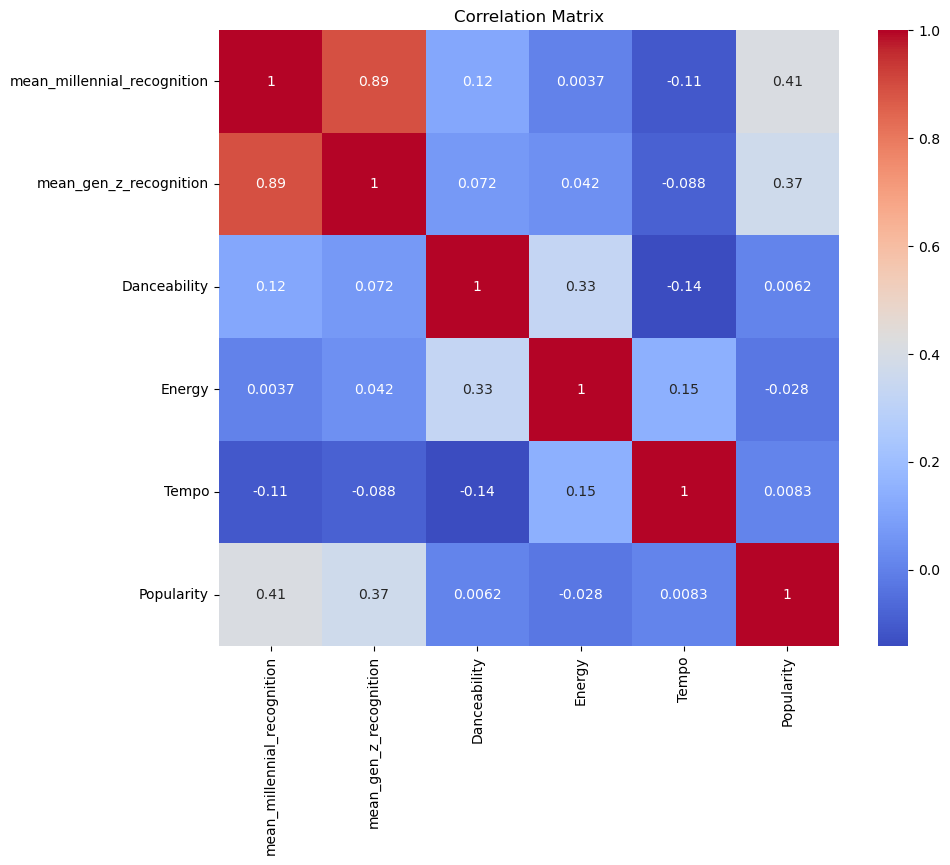

In [292]:
#Correlation Analysis
#This will help us to understand how various features like Tempo, Energy, Danceability, etc.
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numerical columns for correlation analysis
numeric_columns = d3.select_dtypes(include='number')

# Generate the correlation matrix
corr_matrix = numeric_columns.corr()

# Plot the heatmap for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [293]:
# Ensure that only numeric columns are used for the groupby mean calculation
numeric_columns = d3.select_dtypes(include=[np.number])

# Group by 'Cluster' and calculate the mean for numeric columns
clusters_mean = d3.groupby('Cluster')[numeric_columns.columns].mean()

# Display the results
display(clusters_mean)


KeyError: 'Cluster'

In [311]:

# Spotify best hits for 90's track music 
# Code 2 concern US, GB, DE, FR, and JP

import requests
import base64

# Client ID and Client Secret
client_id = 'f054229c9b634cbcb2d15c39841b0565'
client_secret = '965028aa060f4aa6a2d1437dd051d6e0'

# Access Token
def get_token(client_id, client_secret):
    auth_url = 'https://accounts.spotify.com/api/token'
    auth_header = base64.b64encode((client_id + ':' + client_secret).encode('ascii')).decode('ascii')
    auth_data = {
        'grant_type': 'client_credentials'
    }
    headers = {
        'Authorization': 'Basic ' + auth_header
    }
    response = requests.post(auth_url, headers=headers, data=auth_data)
    if response.status_code == 200:
        return response.json()['access_token']
    else:
        raise Exception('Could not authenticate, check your client credentials.')

token = get_token(client_id, client_secret)

# Function to search for hits in a specific country
def search_hits_90s_by_country(token, country, limit=20):
    search_url = "https://api.spotify.com/v1/search"
    headers = {
        "Authorization": f"Bearer {token}"
    }
    query = {
        "q": "year:1990-1999",  
        "type": "track",
        "limit": limit,
        "market": country  # Use specific country code
    }
    response = requests.get(search_url, headers=headers, params=query)
    if response.status_code == 200:
        return response.json()['tracks']['items']
    else:
        raise Exception(f"Error fetching data: {response.status_code}")

# List of countries to query (you can combine countries from different continents)
countries = ['US', 'GB', 'DE', 'FR', 'JP']  # US, UK, Germany, France, Japan

# Dictionary to store unique tracks across countries
unique_tracks = {}

# Search for hits in each country and aggregate results
for country in countries:
    print(f"--- Fetching Top 90s Hits in {country} ---")
    tracks = search_hits_90s_by_country(token, country)
    for track in tracks:
        track_id = track['id']
        if track_id not in unique_tracks:
            unique_tracks[track_id] = track

# Convert the dictionary to a list and sort by Popularity
sorted_tracks = sorted(unique_tracks.values(), key=lambda x: x['Popularity'], reverse=True)


# Print the aggregated and sorted results (limited to top 10)
print("\n--- Aggregated and Sorted Top 90s Hits Across Countries ---\n")
for idx, track in enumerate(sorted_tracks[:10], start=1):# <--- reduce to top 10
    print(f"{idx}. {track['name']} by {track['artists'][0]['name']}")
    print(f"Album: {track['album']['name']}")
    print(f"Popularity: {track['Popularity']}\n")

--- Fetching Top 90s Hits in US ---
--- Fetching Top 90s Hits in GB ---
--- Fetching Top 90s Hits in DE ---
--- Fetching Top 90s Hits in FR ---
--- Fetching Top 90s Hits in JP ---


KeyError: 'Popularity'

In [ ]:
pip install spotipy

In [356]:
import requests
from spotipy import Spotify
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import numpy as np


client_id = 'f054229c9b634cbcb2d15c39841b0565'
client_secret = '965028aa060f4aa6a2d1437dd051d6e0'

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = Spotify(auth_manager=auth_manager)

         # Fonction pour rechercher artiste et obtenir informations
def get_track_popularity(track_name, artist_name):
    result = sp.search(q=f'track:{track_name} artist:{artist_name}', type='track')
    if result['tracks']['items']:
        track = result['tracks']['items'][0]
        track_details = {
            'Name': track['name'],
            'Artist': track['artists'][0]['name'],
            'Popularity': track['popularity']
        }
        return track_details
    else:
       return "Not found"

top_10 = sorted_d3[:9].copy() 


# Ajouter une colonne 'popularity_2024'
top_10['Popularity 2024'] = None

for index, row in top_10.iterrows():
    track_name = row['Track']
    artist_name = row['Artist']
    track_details = get_track_popularity(track_name, artist_name)
    
    if track_details:
        top_10.loc[index, 'Popularity 2024'] = track_details['Popularity']
    else:
        top_10.loc[index, 'Popularity 2024'] = None

top_10



,Artist,Track,mean_millennial_recognition,mean_gen_z_recognition,Duration,Danceability,Energy,Tempo,Popularity,Popularity 2024
11,Barenaked Ladies,One Week,0.728785,0.256913,4:04,0.264,0.640,84.828,91,70
109,Mariah Carey,My All,0.325133,0.173403,2:17,0.504,0.308,113.950,89,66
27,Brandy,Have You Ever?,0.374130,0.165090,2:40,0.741,0.697,116.109,87,59
81,Keith Sweat,Nobody,0.127224,0.109736,3:00,0.358,0.284,99.796,86,62
80,Karyn White,Romantic,0.111855,0.161892,2:12,0.571,0.544,132.052,86,34
175,TLC,Creep,0.418879,0.155975,3:58,0.515,0.430,91.844,86,66
37,Cher,Believe,0.983381,0.899437,3:24,0.776,0.780,124.949,86,78
167,Smash Mouth,All Star,0.951832,0.923792,3:52,0.695,0.633,96.782,86,80
25,Brandy and Monica,The Boy Is Mine,0.597768,0.338540,2:53,0.795,0.630,97.998,86,0


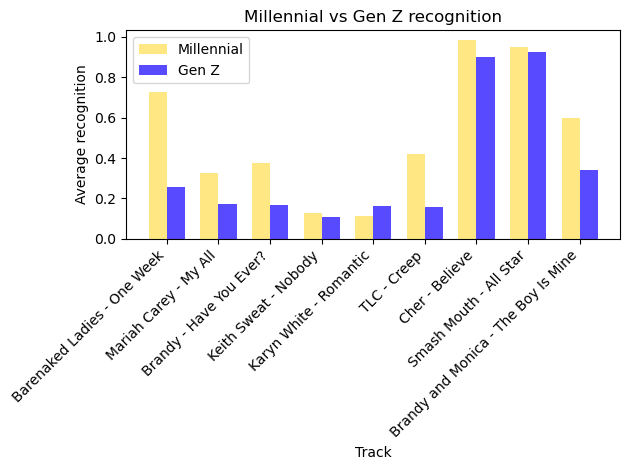

In [339]:


# Espacements pour les barres y-axis
indices = np.arange(len(top_10))
largeur = 0.35  # Largeur des barres

# Création des barres pour la reconnaissance Millennial
plt.bar(indices, top_10['mean_millennial_recognition'], largeur, label='Millennial', color='#ffe883ff')

# Création des barres pour la reconnaissance Gen Z
plt.bar(indices + largeur, top_10['mean_gen_z_recognition'], largeur, label='Gen Z', color='#574affff')

# Ajout des labels, titres et légende
top_10['Label'] = top_10.apply(lambda row: f"{row['Artist']} - {row['Track']}", axis=1)

plt.xlabel('Track')
plt.ylabel('Average recognition')
plt.title('Millennial vs Gen Z recognition')
plt.xticks(indices + largeur / 2, top_10['Label'], rotation=45, ha='right')
plt.tight_layout()
plt.legend()



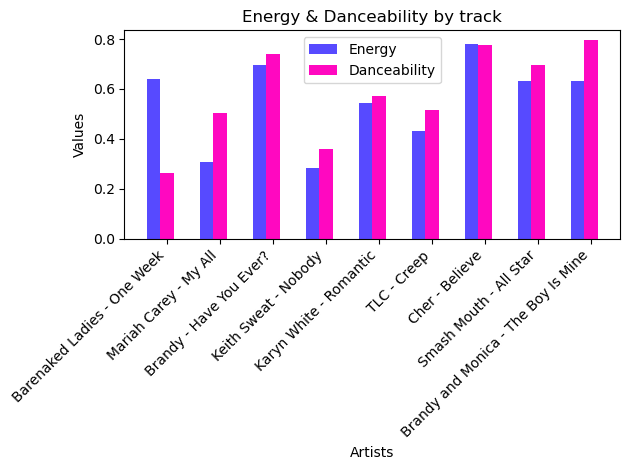

In [345]:

# Espacements pour les barres y-axis
indices = np.arange(len(top_10))
largeur = 0.25  # Largeur des barres, ajustée pour la superposition

# Création des barres pour Energy
plt.bar(indices, top_10['Energy'], largeur, label='Energy', color='#574affff')

# Création des barres pour Danceability
plt.bar(indices + largeur, top_10['Danceability'], largeur, label='Danceability', color='#ff08c0ff')

# Ajout des labels, titre et légende
top_10['Label'] = top_10.apply(lambda row: f"{row['Artist']} - {row['Track']}", axis=1)

plt.xlabel('Artists')
plt.ylabel('Values')
plt.title('Energy & Danceability by track')
plt.xticks(indices + largeur, top_10['Label'], rotation=45, ha='right')

# Affichage du graph
plt.tight_layout()
plt.legend()



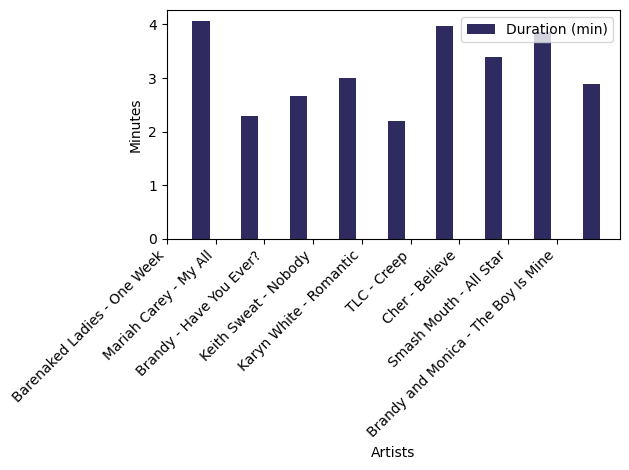

In [343]:
def convert_duration_to_minutes(duration):
    minutes, seconds = map(int, duration.split(':'))
    return minutes + seconds / 60

top_10['Duration_min'] = top_10['Duration'].apply(convert_duration_to_minutes)
# Création des barres pour Duration
plt.bar(indices + 3*largeur, top_10['Duration_min'], largeur, label='Duration (min)', color='#2f2b60ff')

# Ajout des labels, titre et légende
top_10['Label'] = top_10.apply(lambda row: f"{row['Artist']} - {row['Track']}", axis=1)

plt.xlabel('Artists')
plt.ylabel('Minutes')
plt.xticks(indices + largeur, top_10['Label'], rotation=45, ha='right')

# Affichage du graph
plt.tight_layout()
plt.legend()



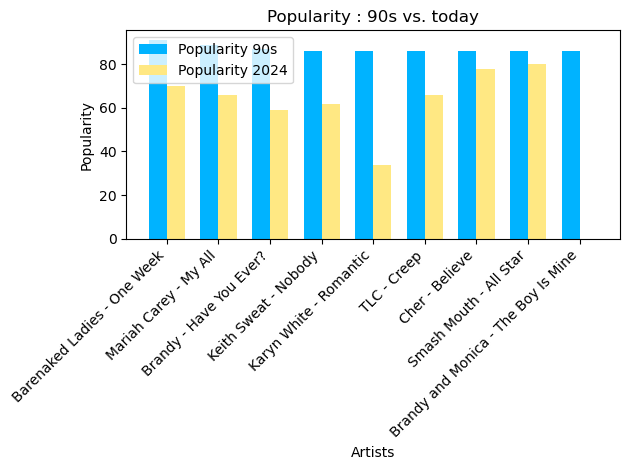

In [358]:
# Espacements pour les barres sur l'axe x
indices = np.arange(len(top_10))
largeur = 0.35  # Largeur des barres, ajustée pour la superposition

# Création des barres pour Popularity
plt.bar(indices, top_10['Popularity'], largeur, label='Popularity 90s', color='#00b3ffff')

# Création des barres pour Popularity 2024#
plt.bar(indices + largeur, top_10['Popularity 2024'], largeur, label='Popularity 2024', color='#ffe883ff')

# Ajout des labels, titre et légende
top_10['Label'] = top_10.apply(lambda row: f"{row['Artist']} - {row['Track']}", axis=1)

plt.xlabel('Artists')
plt.ylabel('Popularity')
plt.title('Popularity : 90s vs. today')
plt.xticks(indices + largeur / 2, top_10['Label'], rotation=45, ha='right')
plt.legend()

# Affichage du graphique
plt.tight_layout()
plt.show()

